Aufgabe 47.

Im Datensatz Fruitfly finden Sie Daten zu einem Experiment aus dem Jahr 1981. Zielgröße ist die Lebensdauer (in Tagen) von männlichen Fruchtfliegen, die in 5 Gruppen eingeteilt wurden. Drei Kontrollgruppen (0c, 1c, 8c) und zwei Testgruppen (1t, 8t). In der Testgruppe 1t kam es zu einer Befruchtung pro Tag, in der Testgruppe 8t zu
acht Befruchtungen pro Tag. Ziel der Untersuchung war es herauszufinden, ob es reproduktive Kosten für männliche Fruchtfliegen gibt: führt das Zeugen vieler Nachkommen zu einer Verkürzung des Lebensdauer der Fruchtfliege? Für weibliche Fruchtfliegen war dies bereits bekannt. Da größere Fruchtfliegen grundsätzlcich länger leben, wurde der Thoraxdurchmesser als Kovariable berücksichtigt.

In [380]:
import pandas as pd
from utils import *
from statsmodels.api import OLS, add_constant
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f

In [381]:
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)
healthy_orange = '#EC6602'
healthy_orange_50 = '#F9B591'
healthy_orange_25 = '#FDDDCB'
siemens_petrol = '#009999'
siemens_petrol_50 = '#87D2D2'
sns.set_palette([healthy_orange, siemens_petrol, healthy_orange_50, healthy_orange_25, siemens_petrol_50])
RANDOM_SEED = 42

In [382]:
df = pd.read_csv('../data/fruitfly.csv', decimal=',')
df.head()

,ID,Group,Longevity,Thorax,Sleep,Type,partners
0,1,8c,35,0.64,22,0,8
1,2,8c,37,0.68,9,0,8
2,3,8c,49,0.68,49,0,8
3,4,8c,46,0.72,1,0,8
4,5,8c,63,0.72,23,0,8


In [383]:
df.to_clipboard(index=False, float_format='%.2f', header=True, sep=',')

In [384]:
show_missing_values(df)

,Column Name,Min,Max,n Unique,NaN count,NaN percentage,dtype
S. No.,,,,,,,
1,ID,1,25,25,0,0.0%,int64
2,Group,nan,nan,5,0,0.0%,object
3,Longevity,16,97,46,0,0.0%,int64
4,Thorax,0.64,0.94,14,0,0.0%,float64
5,Sleep,1,83,47,0,0.0%,int64
6,Type,0,9,3,0,0.0%,int64
7,partners,0,8,3,0,0.0%,int64


In [385]:
df.Group.value_counts()

Group
8c    25
0c    25
1c    25
1t    25
8t    25
Name: count, dtype: int64

In [386]:
df.Type.value_counts()

Type
0    50
1    50
9    25
Name: count, dtype: int64

In [387]:
df.partners.value_counts()

partners
8    50
1    50
0    25
Name: count, dtype: int64

In [388]:
df.shape

(125, 7)

- 0c -> Type: 9, Partners: 0
- 1c -> Type: 0, Partners: 1
- 8c -> Type: 0, Partners: 8
- 1t -> Type: 1, Partners: 1
- 8t -> Type: 1, Partners: 8

    - c -> Type 0, 9
    - t -> Type 1

Hier gibt perfekte lineare Abhängigkeiten, wenn wir diese Features dummy kodieren, deswegen sollen wir die Dummy Variablen systematisch abbilden.

Option 1: Nur Group als Prädiktor benutzen, haben wir dann 4 Kategorien

Option 2: Type (2 Dummy Variablen) und Partners auch (2 Dummy Variablen), hier bekommen wir auch ingesamt 4 Kateogien
- (is_type_0, is_type_1, is_partners_1, is_partners_8) -> Group
- (0, 0, 0, 0) -> 0c
- (1, 0, 1, 0) -> 1c
- (1, 0, 0, 1) -> 8c
- (0, 1, 1, 0) -> 1t
- (0, 1, 0, 1) -> 8t

Option 3: Kompliziert aber ergist sich automatisch, falls wir ohne überlegung weitermachen und später lineare Kombinationen löschen, dann bekommen wir am Ende diese 4 Dummy Variablen:
- is_test, is_type_9, is_partner_1, is_partner_8

In allen Fällen haben wir am Ende 4 Dummy Variablen ohne lineare Abhängigkeit

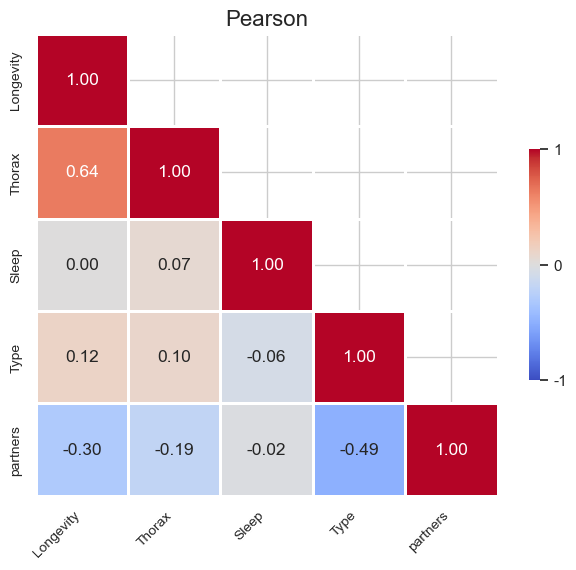

In [389]:
num_corr_heatmap(df.drop(columns=['ID', 'Group']).corr())

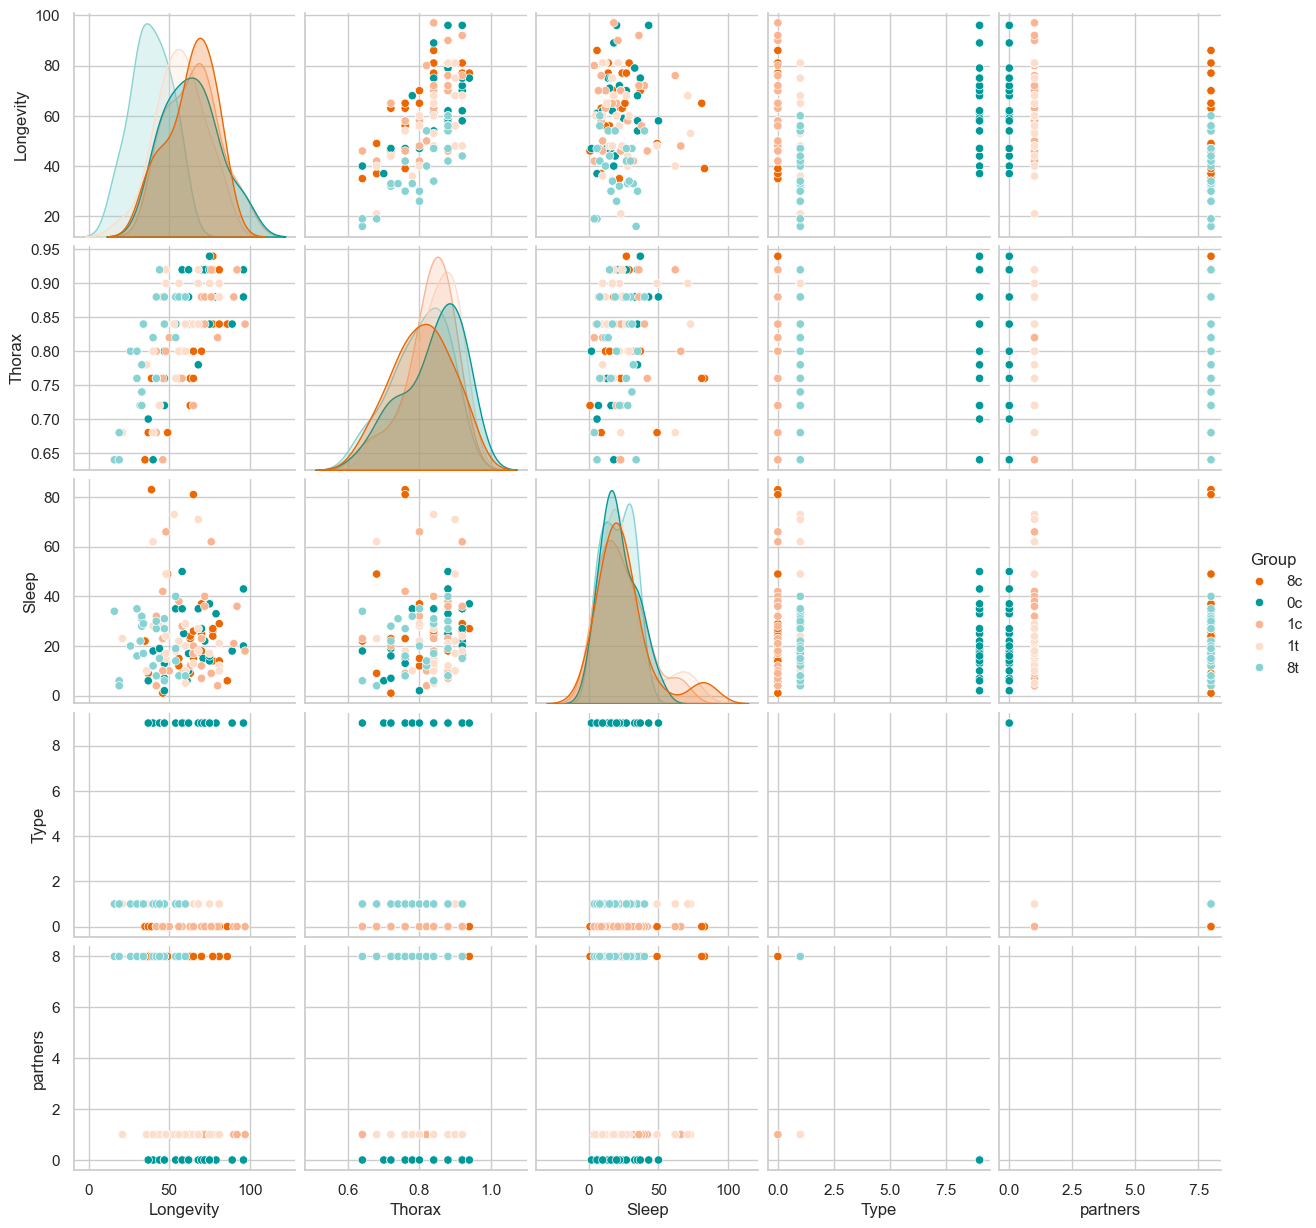

In [390]:
sns.pairplot(df.drop(columns='ID'), hue='Group');

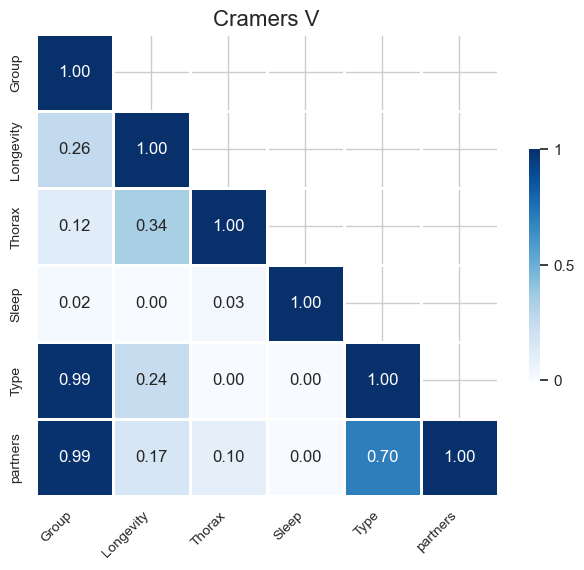

In [391]:
cat_corr_heatmap(cramers_v_matrix(df.drop(columns='ID')))

In [392]:
df.head()

,ID,Group,Longevity,Thorax,Sleep,Type,partners
0,1,8c,35,0.64,22,0,8
1,2,8c,37,0.68,9,0,8
2,3,8c,49,0.68,49,0,8
3,4,8c,46,0.72,1,0,8
4,5,8c,63,0.72,23,0,8


In [393]:
df = pd.get_dummies(df, columns=['Group'],  drop_first=True, dtype=int)
df.head()

,ID,Longevity,Thorax,Sleep,Type,partners,Group_1c,Group_1t,Group_8c,Group_8t
0,1,35,0.64,22,0,8,0,0,1,0
1,2,37,0.68,9,0,8,0,0,1,0
2,3,49,0.68,49,0,8,0,0,1,0
3,4,46,0.72,1,0,8,0,0,1,0
4,5,63,0.72,23,0,8,0,0,1,0


b) Passen Sie ein geeignetes lineares Modell an. 

In [394]:
features = ['Thorax', 'Sleep', 'Group_1c', 'Group_1t', 'Group_8c', 'Group_8t']

In [395]:
X = df[features]
y = df.Longevity
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Longevity   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     38.38
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           1.51e-25
Time:                        23:41:19   Log-Likelihood:                -467.45
No. Observations:                 125   AIC:                             948.9
Df Residuals:                     118   BIC:                             968.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -49.1286     10.600     -4.635      0.0

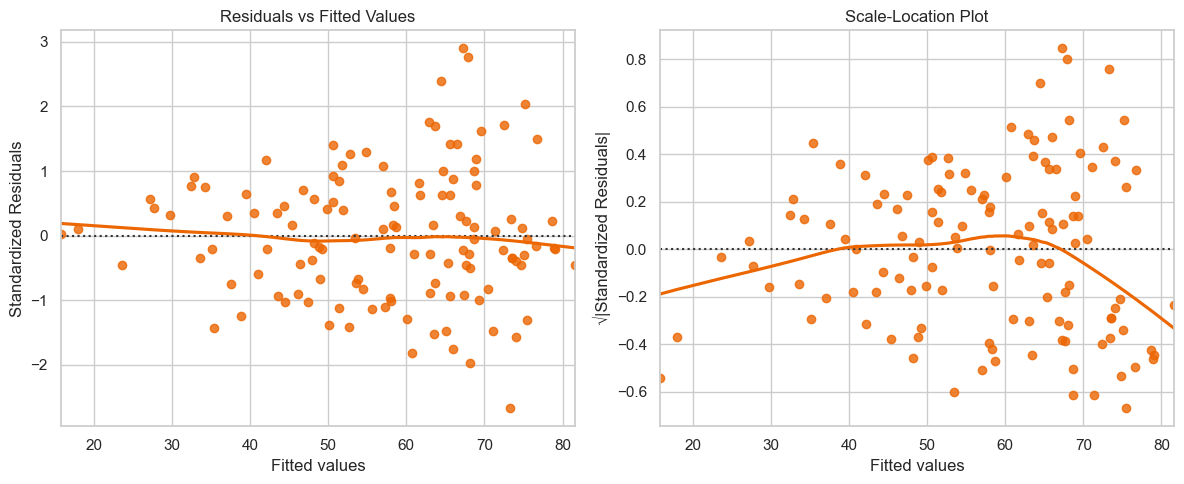

Breusch-Pagan test statistic: p-value = 0.0753
F-statistic: p-value = 0.0733
ARCH test statistic: p-value = 0.0746
F-statistic: p-value = 0.0690
White test statistic: p-value = 0.3251
F-statistic: p-value = 0.3338
Goldfeld-Quandt test statistic: p-value = 0.4147


In [396]:
check_homoscedasticity(model);

In [397]:
print(model.get_robustcov_results().summary())

                            OLS Regression Results                            
Dep. Variable:              Longevity   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     66.00
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           2.16e-35
Time:                        23:41:20   Log-Likelihood:                -467.45
No. Observations:                 125   AIC:                             948.9
Df Residuals:                     118   BIC:                             968.7
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -49.1286      8.252     -5.954      0.0

In [398]:
model.compare_f_test(OLS(y, add_constant(df[['Thorax', 'Sleep']])).fit())[1]

np.float64(1.1449885879222444e-13)

> Also der Effekt von Gruppen ist signifikant.

In [399]:
df[features]

,Thorax,Sleep,Group_1c,Group_1t,Group_8c,Group_8t
0,0.64,22,0,0,1,0
1,0.68,9,0,0,1,0
2,0.68,49,0,0,1,0
3,0.72,1,0,0,1,0
4,0.72,23,0,0,1,0
...,...,...,...,...,...,...
120,0.88,40,0,0,0,1
121,0.88,19,0,0,0,1
122,0.88,8,0,0,0,1
123,0.88,8,0,0,0,1


In [400]:
X = df[features].drop(columns='Sleep')
y = df.Longevity
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Longevity   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     45.46
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           4.79e-26
Time:                        23:41:20   Log-Likelihood:                -468.33
No. Observations:                 125   AIC:                             948.7
Df Residuals:                     119   BIC:                             965.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -49.9843     10.609     -4.711      0.0

Welche Lebensdauer erhalten Sie für eine Fruchtfliege mit Thorax-Durchmesser 0.8 in der Gruppe 8t?

In [401]:
model.predict([1, 0.8, 0, 0, 0, 1]).round(2).item()

38.72

c) Führen Sie eine Residuenanalyse durch. Was fällt Ihnen auf?

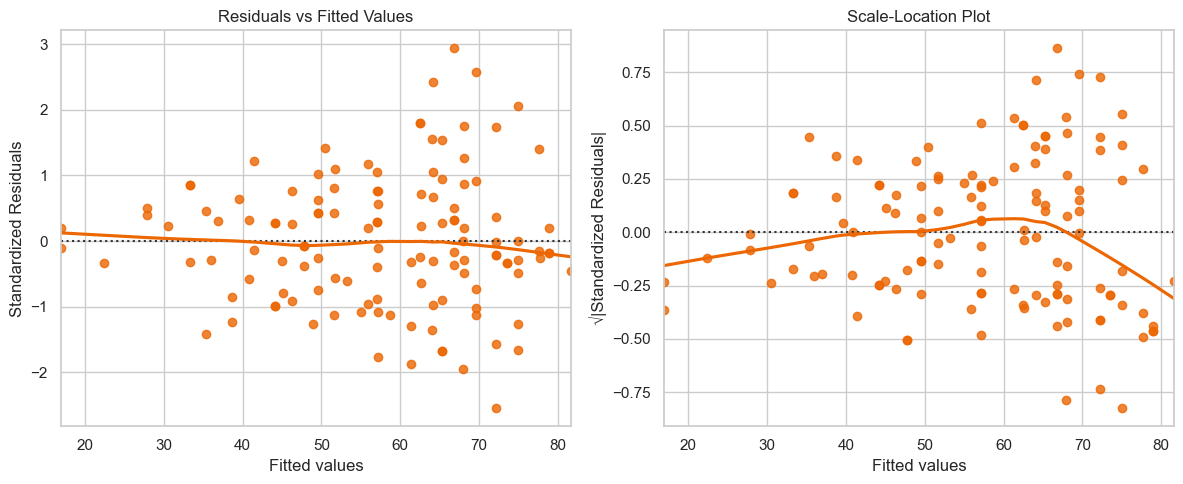

Breusch-Pagan test statistic: p-value = 0.0382
F-statistic: p-value = 0.0361
ARCH test statistic: p-value = 0.0350
F-statistic: p-value = 0.0294
White test statistic: p-value = 0.1175
F-statistic: p-value = 0.1141
Goldfeld-Quandt test statistic: p-value = 0.4228


In [402]:
check_homoscedasticity(model);

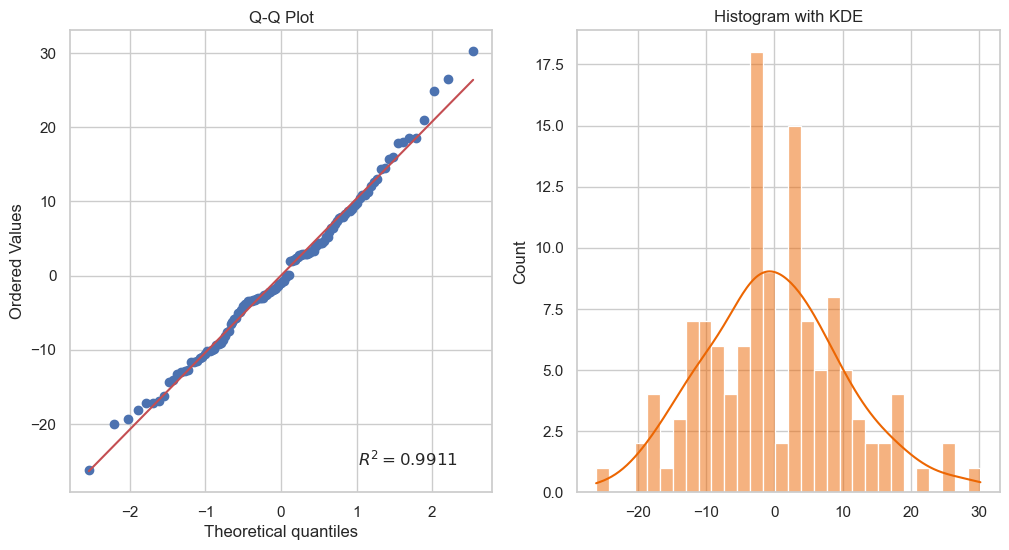

Shapiro-Wilk normality test: p-value = 0.6689
D'Agostino's K^2 normality test: p-value = 0.3624
Kolmogorov-Smirnov normality test: p-value = 0.8822
Anderson-Darling normality test: statistic = 0.3246, critical value = 0.7640


In [403]:
check_normality(model.resid);

> Von dem Residuenplot sieht es aus wie ein Tricterförmiges Muster also einen Hinweis zum Heteroskedastizität, einige HEC Tests wie Breusch-Pagan und ARCH sind auch signifikant. Obwohl sind die anderen Tests wie White sind nicht signifikant.

d) Wiederholen Sie alle Schritte, jetzt mit der Zielgröße ln(Longevity). Hat dies das
Problem behoben?

In [404]:
X = df[features].drop(columns='Sleep')
y = np.log(df.Longevity)
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Longevity   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     57.02
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           5.46e-30
Time:                        23:41:20   Log-Likelihood:                 31.602
No. Observations:                 125   AIC:                            -51.20
Df Residuals:                     119   BIC:                            -34.23
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8212      0.194      9.368      0.0

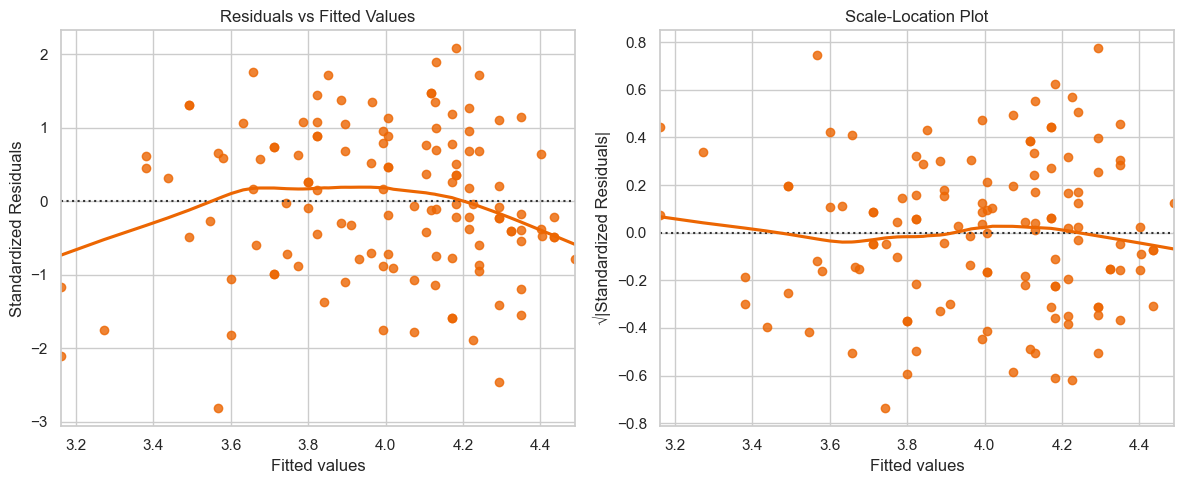

Breusch-Pagan test statistic: p-value = 0.2057
F-statistic: p-value = 0.2093
ARCH test statistic: p-value = 0.5297
F-statistic: p-value = 0.5491
White test statistic: p-value = 0.2763
F-statistic: p-value = 0.2824
Goldfeld-Quandt test statistic: p-value = 0.0339


In [405]:
check_homoscedasticity(model);

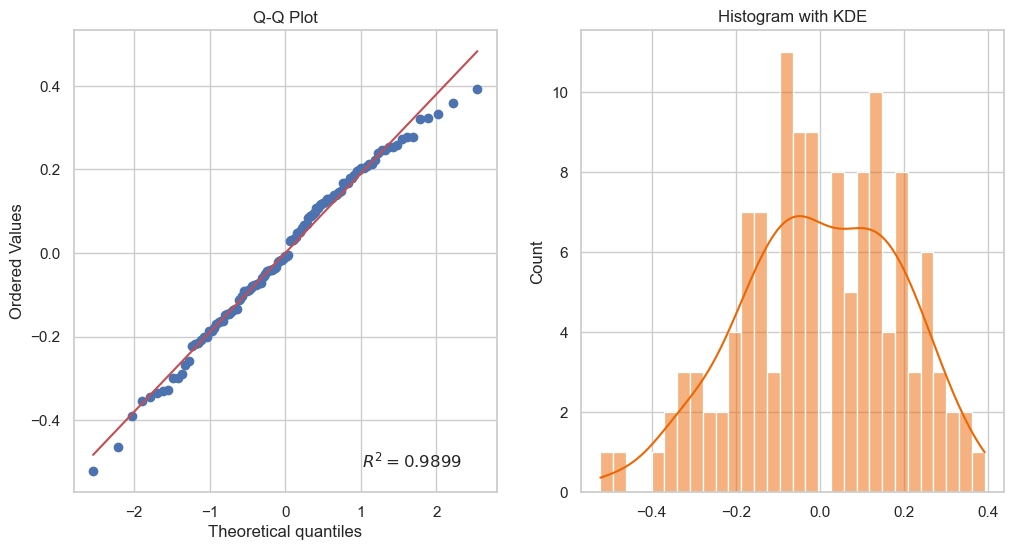

Shapiro-Wilk normality test: p-value = 0.3258
D'Agostino's K^2 normality test: p-value = 0.2922
Kolmogorov-Smirnov normality test: p-value = 0.7393
Anderson-Darling normality test: statistic = 0.3964, critical value = 0.7640


In [406]:
check_normality(model.resid);

In [407]:
np.exp(model.predict([1, 0.8, 0, 0, 0, 1])).round(2).item()

36.68

In [408]:
X

,const,Thorax,Group_1c,Group_1t,Group_8c,Group_8t
0,1.0,0.64,0,0,1,0
1,1.0,0.68,0,0,1,0
2,1.0,0.68,0,0,1,0
3,1.0,0.72,0,0,1,0
4,1.0,0.72,0,0,1,0
...,...,...,...,...,...,...
120,1.0,0.88,0,0,0,1
121,1.0,0.88,0,0,0,1
122,1.0,0.88,0,0,0,1
123,1.0,0.88,0,0,0,1


In [409]:
X

,const,Thorax,Group_1c,Group_1t,Group_8c,Group_8t
0,1.0,0.64,0,0,1,0
1,1.0,0.68,0,0,1,0
2,1.0,0.68,0,0,1,0
3,1.0,0.72,0,0,1,0
4,1.0,0.72,0,0,1,0
...,...,...,...,...,...,...
120,1.0,0.88,0,0,0,1
121,1.0,0.88,0,0,0,1
122,1.0,0.88,0,0,0,1
123,1.0,0.88,0,0,0,1


In [410]:
y_true = df.Longevity
y_pred = np.exp(model.predict(X))
n = X.shape[0]
p = X.shape[1]
sse = np.sum((y_true - y_pred) ** 2)
mse = sse / (n - p)
ssto = np.sum((y_true - np.mean(y_true)) ** 2)
var_y = ssto / (n - 1)
r2 = 1 - (sse / ssto)
r2_adj = 1 - (mse / var_y)
print(f'R²: {r2:.4f}')
print(f'R2 adjusted: {r2_adj:.4f}')

R²: 0.6322
R2 adjusted: 0.6167


### Bonus

In [411]:
df = pd.get_dummies(df, columns=['Type', 'partners'], dtype=int).drop(columns=['Type_9', 'partners_0'])
df.head()

,ID,Longevity,Thorax,Sleep,Group_1c,Group_1t,Group_8c,Group_8t,Type_0,Type_1,partners_1,partners_8
0,1,35,0.64,22,0,0,1,0,1,0,0,1
1,2,37,0.68,9,0,0,1,0,1,0,0,1
2,3,49,0.68,49,0,0,1,0,1,0,0,1
3,4,46,0.72,1,0,0,1,0,1,0,0,1
4,5,63,0.72,23,0,0,1,0,1,0,0,1


In [412]:
df.head()

,ID,Longevity,Thorax,Sleep,Group_1c,Group_1t,Group_8c,Group_8t,Type_0,Type_1,partners_1,partners_8
0,1,35,0.64,22,0,0,1,0,1,0,0,1
1,2,37,0.68,9,0,0,1,0,1,0,0,1
2,3,49,0.68,49,0,0,1,0,1,0,0,1
3,4,46,0.72,1,0,0,1,0,1,0,0,1
4,5,63,0.72,23,0,0,1,0,1,0,0,1


In [413]:
features = ['Thorax', 'Type_0', 'Type_1', 'partners_1', 'partners_8']
X = df[features]
y = np.log(df.Longevity)
X = add_constant(X)
model_c = OLS(y, X).fit()
print(model_c.summary())

                            OLS Regression Results                            
Dep. Variable:              Longevity   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     58.56
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           2.53e-27
Time:                        23:41:20   Log-Likelihood:                 22.847
No. Observations:                 125   AIC:                            -35.69
Df Residuals:                     120   BIC:                            -21.55
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7793      0.207      8.580      0.0

In [414]:
X = add_constant(df[['Thorax', 'Type_0', 'Type_1']])
y = np.log(df.Longevity)
model_r = OLS(y, X).fit()
print(model_r.summary())

                            OLS Regression Results                            
Dep. Variable:              Longevity   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     69.85
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           2.77e-26
Time:                        23:41:20   Log-Likelihood:                 18.005
No. Observations:                 125   AIC:                            -28.01
Df Residuals:                     121   BIC:                            -16.70
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6733      0.212      7.902      0.0

In [415]:
model_c.compare_f_test(model_r)

(np.float64(9.665266791227895),
 np.float64(0.002345533569022556),
 np.float64(1.0))

In [416]:
np.exp(model_c.predict([1, 0.8, 0, 1, 0, 1])).round(2).item()

39.78

In [417]:
features = ['Thorax', 'Type_0', 'Type_1', 'partners_1', 'partners_8']
X = df[features]
y = df.Longevity
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Longevity   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     49.68
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           1.36e-24
Time:                        23:41:20   Log-Likelihood:                -474.05
No. Observations:                 125   AIC:                             958.1
Df Residuals:                     120   BIC:                             972.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -51.8097     11.045     -4.691      0.0

In [418]:
model.predict([1, 0.8, 0, 1, 0, 1]).round(2).item()

42.26

### Frage:

1- Wenn ich mit Option 1 kodiere, bekomme ich den vorhesagen Wert von 38.72 bzws. mit Log Transformation 36.68 aber wenn ich mit Option 2 dummy kodiere, bekommen ich 42.26 bzw. mit Log Transformation 39.78, warum 2 unterschiedliche Werte obwohl Option 1 und Option 2 sind nur mathematische Umformulierung?

2- Man bekommt ja andere Werte wenn man die Zielvariable Log Transformiert und dann das Ergebnis exponiert, dann warum ist es Sinnvoll die Zielvariable zu transformieren, woher wissen wir dass diese "andere" Werte unsere eigentliche Werte gut representieren, weil die gutemaße ist jetzt nur für die Transformation selbst und nicht die tatsächliche Variable. Wir haben ein Problem erhoben, aber anscheinend haben wir jetzt ein anderes Problem. Also unser tatsächlichen R2 nach der Rücktransformation ist 0.63 bzw. R2-Adjusted 0.61 im Vergleich zum ohne Transfomation, was 0.70 bzw. 0.69 war.